<a href="https://colab.research.google.com/github/HayeonKimm/project/blob/master/Project/Machine-Learning/toy_machine_pjt/%EC%84%9C%EC%9A%B8_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0(%ED%86%A0%EC%9D%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import tensorflow as tf
# import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import os
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/국토교통부_표준주택가격_20210101.csv',encoding='cp949')
df.head()

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,용도지구,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,32.45,22.52,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,33.00,23.91,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,67.40,38.62,1,(2/0),제1종일반주거지역,자연경관지구,소로한면,부정형,연와조,1967,고급 주택지대,941000000
3,서울특별시,종로구,4,청운동 15-10,창의문로1길 20-5,대,단독주택,637.5,508.97,189.33,54.42,29.70,2,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,철근콘크리트조(RC조 RS조),1978,고급 주택지대,2775000000
4,서울특별시,종로구,5,청운동 15-26,창의문로1길 7,대,단독주택,62.8,33.06,33.06,52.64,52.64,1,(1/0),자연녹지지역,자연경관지구,세로(불),사다리형,시멘트블럭조,1963,기존 주택지대,99700000


In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [8]:
import missingno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

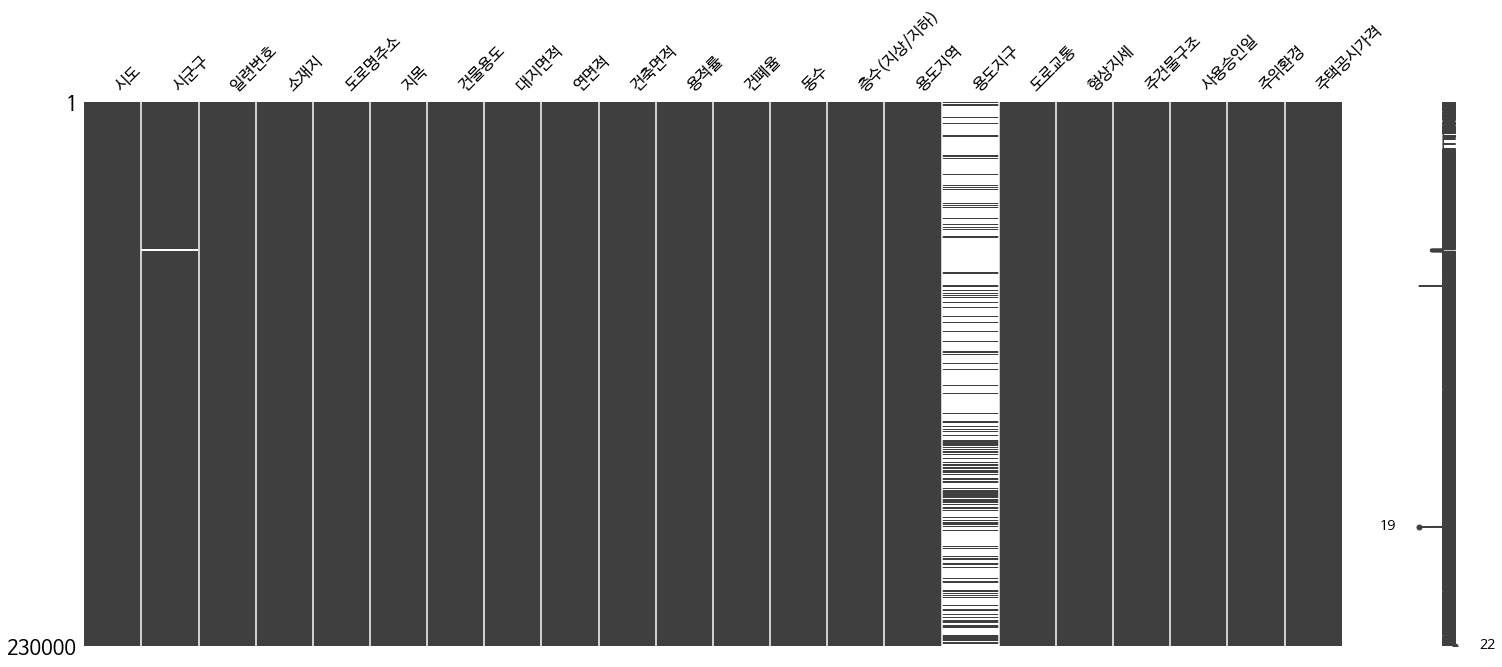

In [9]:
missingno.matrix(df)

In [10]:
df.isnull().sum()

시도              176
시군구            1148
일련번호              0
소재지               0
도로명주소             0
지목                0
건물용도              0
대지면적              0
연면적               0
건축면적              0
용적률               0
건폐율               0
동수                0
층수(지상/지하)         0
용도지역              0
용도지구         175538
도로교통              0
형상지세              0
주건물구조             0
사용승인일             0
주위환경              0
주택공시가격            0
dtype: int64

## 칼럼 확인

In [11]:
df.columns

Index(['시도', '시군구', '일련번호', '소재지', '도로명주소', '지목', '건물용도', '대지면적', '연면적',
       '건축면적', '용적률', '건폐율', '동수', '층수(지상/지하)', '용도지역', '용도지구', '도로교통', '형상지세',
       '주건물구조', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

In [12]:
# import seaborn as sns

# sns.pairplot(train_data[["MEDV", "RM", "AGE", "DIS", "PTRATIO"]]);

In [13]:
df.head(3)

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,용도지구,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,32.45,22.52,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,33.00,23.91,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,67.40,38.62,1,(2/0),제1종일반주거지역,자연경관지구,소로한면,부정형,연와조,1967,고급 주택지대,941000000


## 범주형 선별, 드랍

In [14]:
df.drop(['도로명주소','일련번호','형상지세','주건물구조','지목','층수(지상/지하)'],axis=1,inplace=True)
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


In [15]:
# df.isnull().sum()
df.head(3)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동 8-3,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,자연경관지구,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동 12-9,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,자연경관지구,소로한면,1967,고급 주택지대,941000000


In [16]:
df['소재지']

0               청운동 4-18
1                청운동 8-3
2               청운동 12-9
3              청운동 15-10
4              청운동 15-26
               ...      
229995       표선면 토산리 540
229996     표선면 토산리 936-3
229997    표선면 토산리 1363-4
229998    표선면 토산리 1416-3
229999    표선면 토산리 1826-1
Name: 소재지, Length: 230000, dtype: object

## 서울 데이터 뽑아내기

In [17]:
df=df[df['시도'] == '서울특별시']
df['시도'].value_counts()

서울특별시    22510
Name: 시도, dtype: int64

## 데이터 전처리

In [18]:
df['소재지']=df['소재지'].str[:4]

In [19]:
df.head()

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,자연경관지구,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,자연경관지구,소로한면,1967,고급 주택지대,941000000
3,서울특별시,종로구,청운동,단독주택,637.5,508.97,189.33,54.42,29.70,2,제1종일반주거지역,자연경관지구,세로(가),1978,고급 주택지대,2775000000
4,서울특별시,종로구,청운동,단독주택,62.8,33.06,33.06,52.64,52.64,1,자연녹지지역,자연경관지구,세로(불),1963,기존 주택지대,99700000


In [20]:
# df=df.drop(columns='도로교통')
# df=df.drop(columns='동수')

In [21]:
df.columns

Index(['시도', '시군구', '소재지', '건물용도', '대지면적', '연면적', '건축면적', '용적률', '건폐율', '동수',
       '용도지역', '용도지구', '도로교통', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

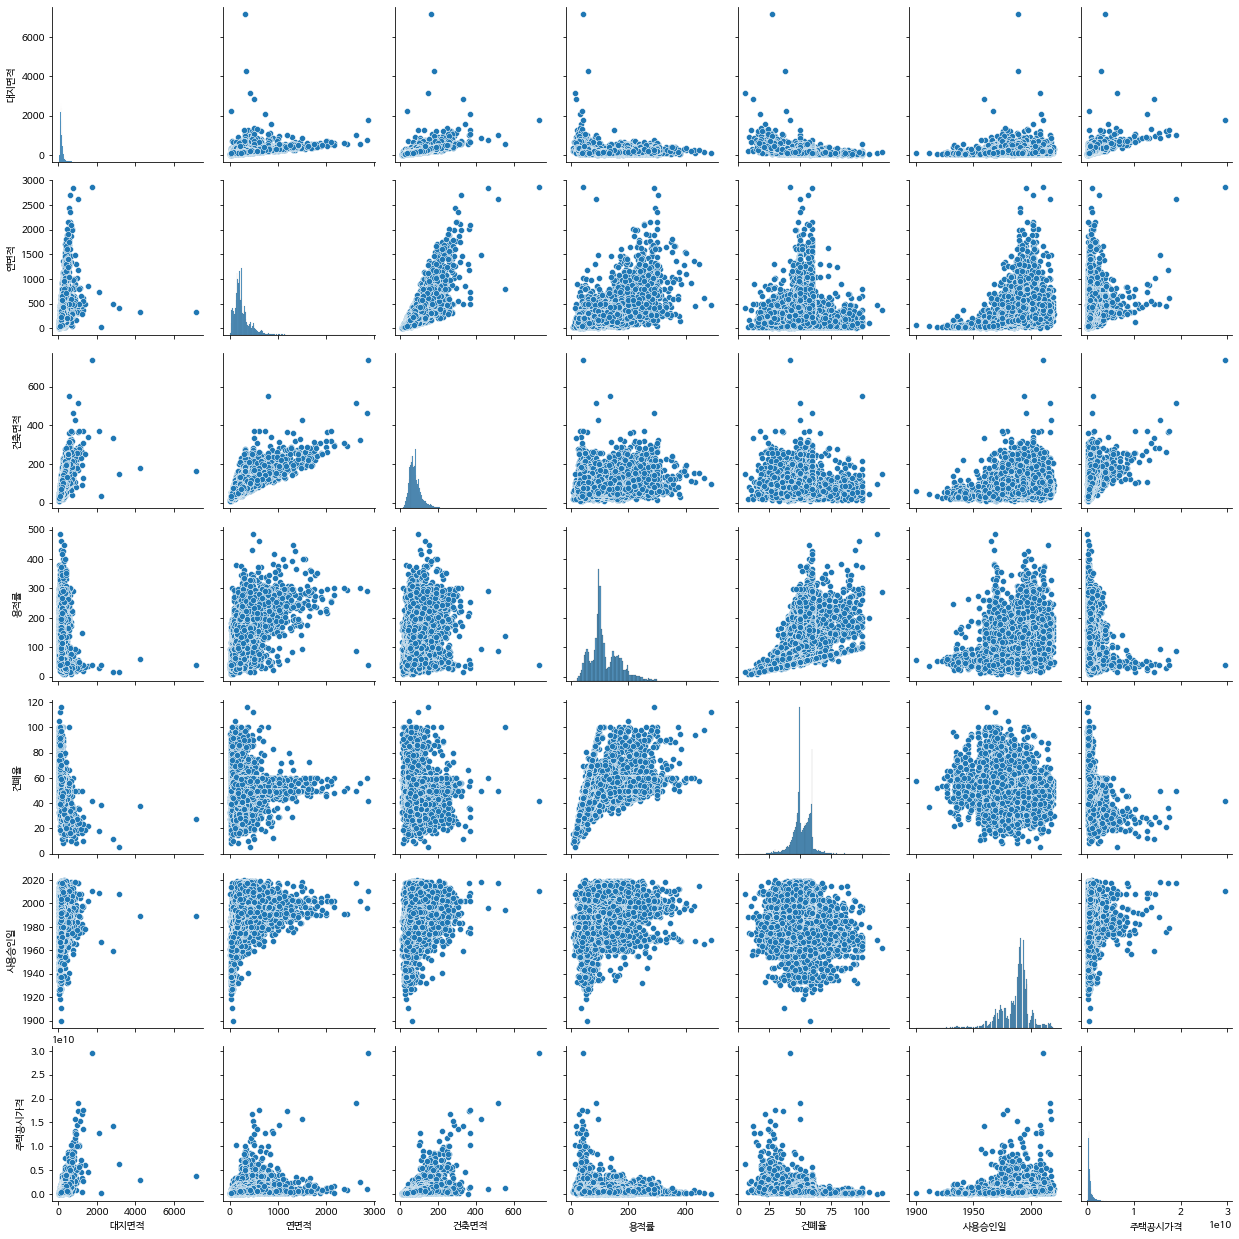

In [22]:
import seaborn as sns

sns.pairplot(df[['대지면적', '연면적', '건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']]);

In [47]:
df[['건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']].corr()

,건축면적,용적률,건폐율,주택공시가격
건축면적,1.000000,0.333315,-0.060581,0.582969
용적률,0.333315,1.000000,0.427492,-0.041549
건폐율,-0.060581,0.427492,1.000000,-0.256250
주택공시가격,0.582969,-0.041549,-0.256250,1.000000


### 건축면적 , 연면적은 상관관계가 크다. 둘 중 하나만 쓰자.

### 용적률과 건폐율도 비슷하긴한데 , 우선 냅두자

In [23]:
df=df.drop('연면적',1)

In [24]:
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


## 시군구가 더 좋은 변수일지 소재지가 좋은 변수일지는 아직 모르겠다.
## 일단 시군구로 둔다. 소재지는 너무 카테고리 수가 많아서 오히려 과적합 가능성이 될거라 생각

In [25]:
df.drop(columns=['소재지','시도'],inplace=True)
df.head(1)

,시군구,건물용도,대지면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,종로구,단독주택,1193.4,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


## 칼럼 정리

In [26]:
 df=df[['시군구','건물용도','용도지역'	,'용도지구','주위환경',	'건축면적'	,'용적률'	,'건폐율'		,'사용승인일'	,'주택공시가격']]
df.head(1)

,시군구,건물용도,용도지역,용도지구,주위환경,건축면적,용적률,건폐율,사용승인일,주택공시가격
0,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,268.7,32.45,22.52,1994,4655000000


In [28]:
# df=df.drop('도로교통',1)

## 사용승인일 피쳐 확인 및 가공

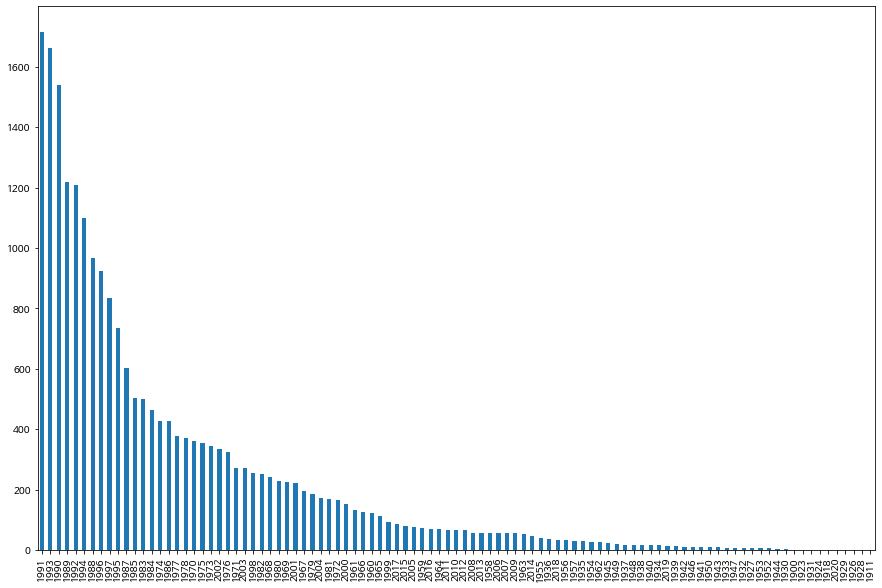

In [32]:
plt.figure(figsize=(15,10))
df['사용승인일'].value_counts().plot.bar()

In [37]:
df['사용승인일'] = np.where(df.사용승인일<1900,'0',
                         np.where(df.사용승인일<1910,'1',
                         np.where(df.사용승인일<1920,'2',
                         np.where(df.사용승인일<1930,'3',
                         np.where(df.사용승인일<1940,'4',
                         np.where(df.사용승인일<1950,'5',
                                  np.where(df.사용승인일<1960,'6',
                                  np.where(df.사용승인일<1970,'7',
                                  np.where(df.사용승인일<1980,'8',
                                  np.where(df.사용승인일<1990,'9',
                                  np.where(df.사용승인일<2000,'10',
                                  np.where(df.사용승인일<2010,'11',
                                  np.where(df.사용승인일<2020,'12','13')))))))))))))

## 건축면적, 용적률 

### 이상치 검사

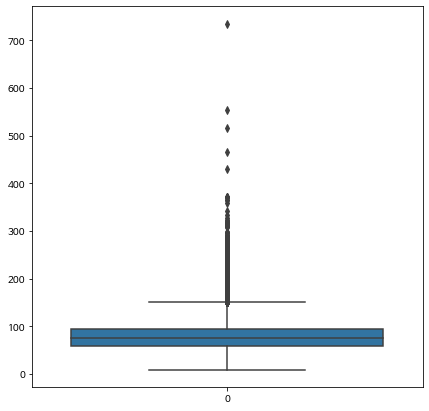

In [44]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df['건축면적'])

# 이상치 출력 함수

In [48]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
  
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [50]:
outlier_iqr(df,'건축면적')

IQR은 36.75750000000001 이다.
lower bound 값은 2.863749999999989 이다.
upper bound 값은 149.89375 이다.
총 이상치 개수는 1066 이다.


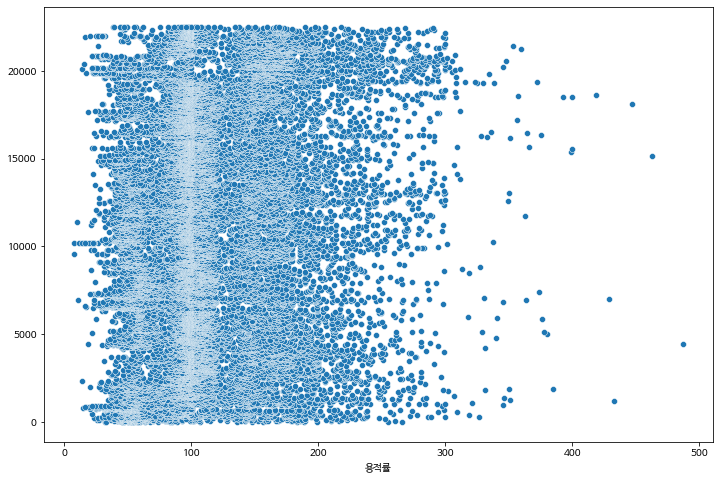

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='용적률',y=df.index)

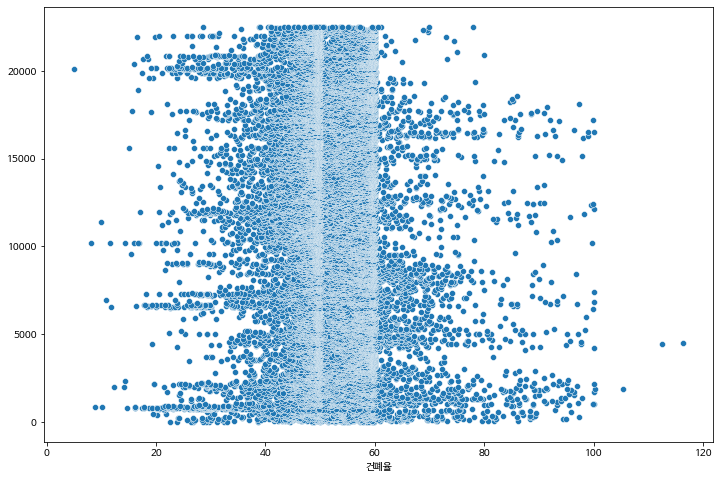

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='건폐율',y=df.index)

In [62]:
count1=0
for i in df['용적률'] :
  
  if i >= 300:
    count1+=1

print(count1)

79


In [63]:
count0=0
for i in df['용적률'] :
  
  if i <= 300:
    count0+=1

print(count0)

22432


In [ ]:
plt.figure(figsize=(10,7))
df['용적률'].value_counts().plot.bar()

In [ ]:
plt.figure(figsize=(10,7))
df['건폐율'].value_counts().plot.bar()

In [39]:
df['건축면적'] = np.where(df.용적률<1900,'0',
                         np.where(df.용적률<1910,'1',
                         np.where(df.사용승인일<1920,'2',
                         np.where(df.사용승인일<1930,'3',
                         np.where(df.사용승인일<1940,'4',
                         np.where(df.사용승인일<1950,'5',
                                  np.where(df.사용승인일<1960,'6',
                                  np.where(df.사용승인일<1970,'7',
                                  np.where(df.사용승인일<1980,'8',
                                  np.where(df.사용승인일<1990,'9',
                                  np.where(df.사용승인일<2000,'10',
                                  np.where(df.사용승인일<2010,'11',
                                  np.where(df.사용승인일<2020,'12','13')))))))))))))


df['용적률'] = np.where(df.사용승인일<1900,'0',
                         np.where(df.사용승인일<1910,'1',
                         np.where(df.사용승인일<1920,'2',
                         np.where(df.사용승인일<1930,'3',
                         np.where(df.사용승인일<1940,'4',
                         np.where(df.사용승인일<1950,'5',
                                  np.where(df.사용승인일<1960,'6',
                                  np.where(df.사용승인일<1970,'7',
                                  np.where(df.사용승인일<1980,'8',
                                  np.where(df.사용승인일<1990,'9',
                                  np.where(df.사용승인일<2000,'10',
                                  np.where(df.사용승인일<2010,'11',
                                  np.where(df.사용승인일<2020,'12','13')))))))))))))

df['건폐율'] = np.where(df.사용승인일<1900,'0',
                         np.where(df.사용승인일<1910,'1',
                         np.where(df.사용승인일<1920,'2',
                         np.where(df.사용승인일<1930,'3',
                         np.where(df.사용승인일<1940,'4',
                         np.where(df.사용승인일<1950,'5',
                                  np.where(df.사용승인일<1960,'6',
                                  np.where(df.사용승인일<1970,'7',
                                  np.where(df.사용승인일<1980,'8',
                                  np.where(df.사용승인일<1990,'9',
                                  np.where(df.사용승인일<2000,'10',
                                  np.where(df.사용승인일<2010,'11',
                                  np.where(df.사용승인일<2020,'12','13')))))))))))))

,시군구,건물용도,용도지역,용도지구,주위환경,건축면적,용적률,건폐율,사용승인일,주택공시가격
0,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,268.70,32.45,22.52,10,4655000000
1,종로구,단독주택,제1종일반주거지역,자연경관지구,일반 주택지대,220.93,33.00,23.91,7,3134000000
2,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,91.54,67.40,38.62,7,941000000


In [ ]:
# # import seaborn as sns

# sns.pairplot(df[[ '건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']])

In [64]:
df.head(1)

,시군구,건물용도,용도지역,용도지구,주위환경,건축면적,용적률,건폐율,사용승인일,주택공시가격
0,종로구,단독주택,제1종일반주거지역,자연경관지구,고급 주택지대,268.7,32.45,22.52,10,4655000000


In [65]:
df2=df.drop('용도지구',1)
df2=pd.get_dummies(df2, columns = ['시군구'	,'건물용도',	'용도지역','주위환경'	])

# 더미변수 생성

## split train , test

In [66]:
X = df2.drop(columns='주택공시가격')
y = df2['주택공시가격']

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [69]:
print(x_train.shape,
x_test.shape)

(15757, 87) (6753, 87)


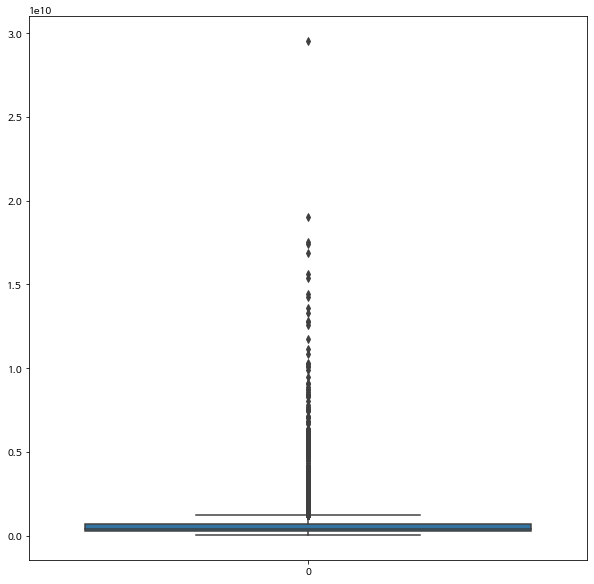

In [74]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2['주택공시가격'])

In [80]:
df2['주택공시가격'].describe()

count    2.251000e+04
mean     6.170449e+08
std      7.578824e+08
min      3.160000e+07
25%      2.950000e+08
50%      4.160000e+08
75%      6.750000e+08
max      2.953000e+10
Name: 주택공시가격, dtype: float64

In [81]:
df2['주택공시가격'] = np.where(df2.주택공시가격<600000000,1,2)
                        #  np.where(df2.주택공시가격<1910,'1',
                        #  np.where(df2.주택공시가격<1920,'2',
                        #  np.where(df2.주택공시가격<1930,'3',
                        #  np.where(df2.주택공시가격<1940,'4',
                        #  np.where(df2.주택공시가격<1950,'5',
                        #           np.where(df2.주택공시가격<1960,'6',
                        #           np.where(df2.주택공시가격<1970,'7',
                        #           np.where(df2.주택공시가격<1980,'8',
                        #           np.where(df2.주택공시가격<1990,'9',
                        #           np.where(df2.주택공시가격<2000,'10',
                        #           np.where(df2.주택공시가격<2010,'11',
                        #           np.where(df2.주택공시가격<2020,'12','13')))))))))))))

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [83]:
X = df2.drop(columns='주택공시가격')
y = df2['주택공시가격']

In [84]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [85]:
print(x_train.shape,
x_test.shape)

(15757, 87) (6753, 87)


In [89]:
df2.주택공시가격.value_counts()

1    15578
2     6932
Name: 주택공시가격, dtype: int64

In [ ]:

# x_train = np.asarray(train.drop('주택공시가격',1))
# y_train = np.asarray(train['주택공시가격'])
# x_test = np.asarray(test.drop('주택공시가격',1))
# y_test = np.asarray(test['주택공시가격'])
# eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

## Random Foreset

<!-- ## 에러값이 너무 크다.. 왜? -->
-------...




In [90]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
# rf_pred=rf.predict(x_test)

mse = mean_squared_error(y_test, rf.predict(x_test))
print('{:.4f}'.format(mse))

0.0782


## 오류찾기

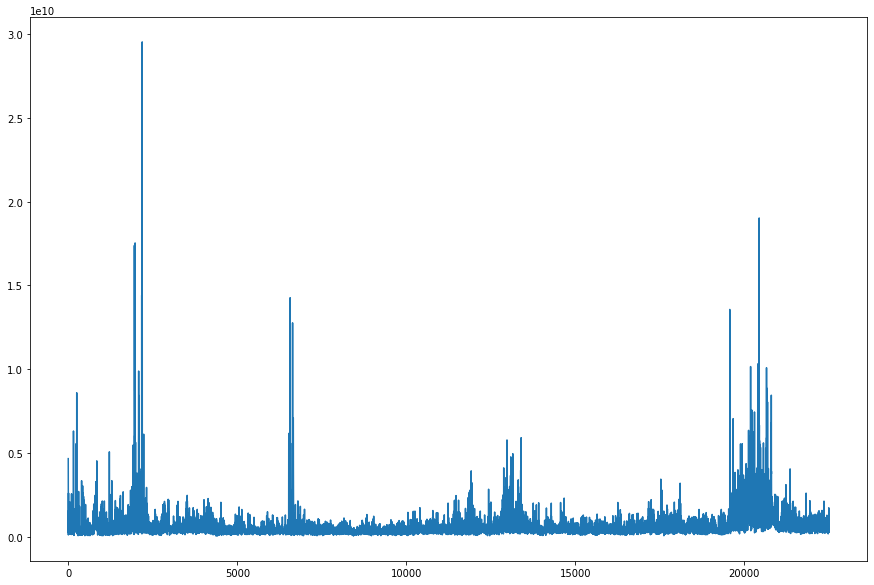

In [ ]:
df.head(1)
plt.figure(figsize=(15,10))
df['주택공시가격'].plot.line()

## 값이 너무 제각각이다. 정규화가 필요하다 생각..

## 이상치도 제거필요.. 가격이 너무 높은 주택들이 있을 것 같다.

In [ ]:
df['주택공시가격'].str[:]

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators':[100,200,300],
#     'max_depth' : [6, 8, 10, 12], 
#     'min_samples_leaf' : [8, 12, 18 ],
#     'min_samples_split' : [8, 16, 20]
# }
# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1 )
# grid_cv.fit(x_train , y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

## Fearture importances_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'early_stopping': 'True', 'learning_rate': 0.02, 'max_depth': 4, 'max_iter': 200, 'min_samples_leaf': 1, 'random_state': 0}


In [ ]:
params = {'max_iter': 200, # 트리의 개수
          'max_depth': 4,
           'min_samples_leaf': 1,
          'learning_rate': 0.02,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음


hist = ensemble.HistGradientBoostingRegressor(**params)
hist.fit(x_train, y_train)

mse = mean_squared_error(y_test, hist.predict(x_test))
print('{:.4f}'.format(mse))

107258468579512560.0000


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
params = {'max_iter': 100, # 트리의 개수
          'max_depth': 5,
           'min_samples_leaf': 1,
          'learning_rate': 0.05,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음




xgb = XGBRegressor(**params)
xgb.fit(train_x, train_y)


y_preds = xgb.predict(test_x)
mse = mean_squared_error(test_y, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(test_y, y_preds)))



# mse = mean_squared_error(y_test, hist.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, hist.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

[08:19:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 78116467036234592.000 , RMSE : 279493232.541
Variance score : 0.839


In [ ]:
# xgb=XGBRegressor()
# xgb.fit(train_x,train_y)
# pred=xgb.predict(test_x)

[07:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## mse

In [ ]:
from sklearn.metrics import mean_squared_error

# rmsle

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(xgb, train_x, train_y, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))ㄴ

[07:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re